In [1]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.sql import text
import matplotlib.pyplot as plt

engine = create_engine('postgresql://postgres: @localhost:5432/Employee_SQL_Homework_db')
conn = engine.connect()

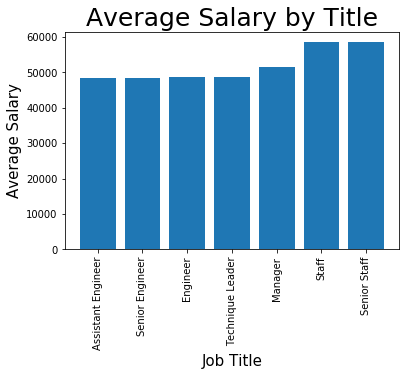

In [2]:
sql_statement  = "select t.title, to_char(round(avg(s.salary), 2), 'L999,999.99'), round(avg(s.salary), 2) "
sql_statement += "from salaries s "
sql_statement += "join titles t on t.emp_no = s.emp_no "
sql_statement += "group by t.title "
sql_statement += "order by 3"

s = text(sql_statement)
rows = conn.execute(s).fetchall()

df = pd.DataFrame(rows, columns = ['title','avg_salary', 'salary'])

#plt.bar(df['title'], df['avg_salary'])
plt.bar(df['title'], df['salary'])
plt.xticks(rotation='vertical')
plt.title("Average Salary by Title", fontsize=25)
plt.xlabel("Job Title", fontsize=15)
plt.ylabel("Average Salary", fontsize=15)

#plt.ylim((40000,60000))
plt.show()